In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("kc_house_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.id.nunique()


21436

In [5]:
df.duplicated().sum() # pour savoir si il y a des ligne dupliquer


0

In [6]:
df.isnull().sum()# pour savoir si il y a des données null

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
pd.set_option('display.max_columns', None) #-- pour avoir tout le tableau dans sa largeur 
df.head()

df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

# formater les objets datetime dans le format jj/mm/aaaa
df['date'] = df['date'].dt.strftime('%d/%m/%Y')





In [8]:
# créer un masque pour les identifiants en double
mask = df.duplicated(subset=['id'], keep=False)

# sélectionner les colonnes avec des identifiants en double
colonnes_doublons = df.loc[mask, :]

# afficher les colonnes correspondantes
colonnes_doublons
colonnes_doublons.sort_values(by=['id'])



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2497,1000102,22/04/2015,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
2496,1000102,16/09/2014,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
16814,7200179,16/10/2014,150000.0,2,1.00,840,12750,1.0,0,0,3,6,840,0,1925,0,98055,47.4840,-122.211,1480,6969
16815,7200179,24/04/2015,175000.0,2,1.00,840,12750,1.0,0,0,3,6,840,0,1925,0,98055,47.4840,-122.211,1480,6969
11434,109200390,20/10/2014,250000.0,3,1.75,1480,3900,1.0,0,0,4,7,1480,0,1980,0,98023,47.2977,-122.367,1830,6956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345,9828200460,27/06/2014,260000.0,2,1.00,700,4800,1.0,0,0,3,7,700,0,1922,0,98122,47.6147,-122.300,1440,4800
15200,9834200305,10/02/2015,615000.0,3,1.00,1790,3876,1.5,0,0,5,7,1090,700,1904,0,98144,47.5750,-122.288,1360,4080
15199,9834200305,16/07/2014,350000.0,3,1.00,1790,3876,1.5,0,0,5,7,1090,700,1904,0,98144,47.5750,-122.288,1360,4080
1085,9834200885,17/07/2014,360000.0,4,2.50,2080,4080,1.0,0,0,5,7,1040,1040,1962,0,98144,47.5720,-122.290,1340,4080


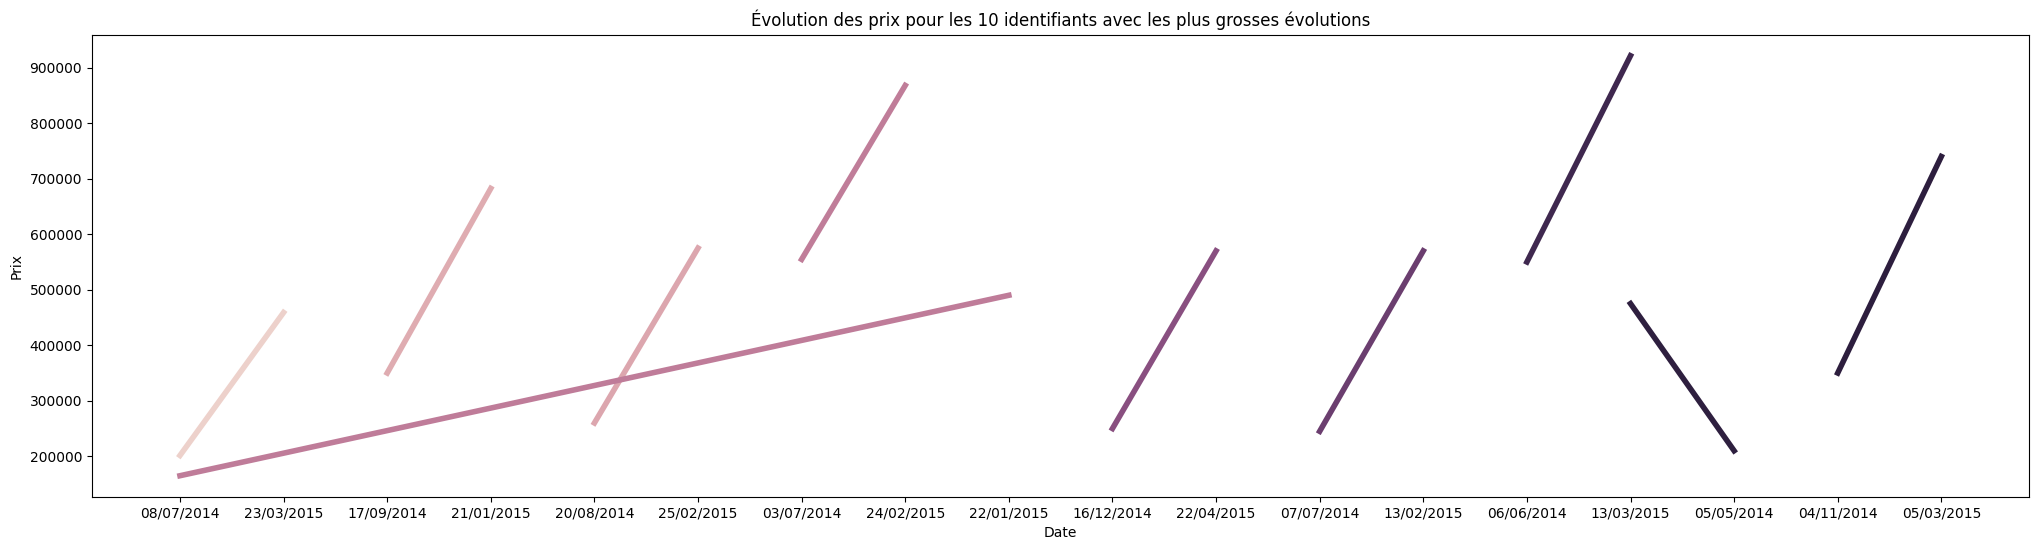

In [9]:

# trier les données par identifiant et par date
colonnes_doublons = colonnes_doublons.sort_values(by=['id', 'date'])

# calculer la différence de prix pour chaque ligne par rapport à la ligne précédente
colonnes_doublons['diff_prix'] = colonnes_doublons.groupby('id')['price'].diff()

# calculer la moyenne de ces différences de prix pour chaque identifiant
moyennes_diff_prix = colonnes_doublons.groupby('id')['diff_prix'].mean()

# sélectionner les 10 identifiants avec les moyennes de différences de prix les plus élevées
top_10_ids = moyennes_diff_prix.nlargest(10).index

# sélectionner les lignes correspondantes aux 10 identifiants sélectionnés
colonnes_doublons_top_10 = colonnes_doublons[colonnes_doublons['id'].isin(top_10_ids)]
# créer le graphique en utilisant Seaborn
fig, ax = plt.subplots(figsize=(25,6))
sns.lineplot(data=colonnes_doublons_top_10, x='date', y='price', hue='id', legend=None , linewidth=4)

# ajouter des étiquettes et des titres
ax.set_xlabel('Date')
ax.set_ylabel('Prix')
ax.set_title('Évolution des prix pour les 10 identifiants avec les plus grosses évolutions')

# afficher le graphique
plt.show()

In [10]:
# Recherche des doublons dans la colonne 'id'
mask = df.duplicated(subset=['id'], keep=False)

# Tri du dataframe par date en ordre décroissant
df_sorted = df.sort_values('date', ascending=False)

# Suppression des doublons et conservation de la ligne avec la date la plus récente
df_unique = df_sorted.drop_duplicates(subset='id', keep='first')

# Affichage du nombre de lignes avant et après suppression des doublons
print("Nombre de lignes avant suppression des doublons :", len(df))
print("Nombre de lignes après suppression des doublons :", len(df_unique))


Nombre de lignes avant suppression des doublons : 21613
Nombre de lignes après suppression des doublons : 21436


In [11]:
# df = df.sort_values(by=['id', 'date'], ascending=[True, False])

# # conserver uniquement la première occurrence de chaque identifiant
# df = df.drop_duplicates(subset=['id'], keep='first')
# df.sort_values(by=['id',])

In [12]:
# nuage de point entre prix et metre carre (surface)

# g =sns.scatterplot(data=df,x="price", y="sqft_living")


In [13]:
# g =sns.scatterplot(data=df,x="price", y="sqft_basement")


# Prix par rapport à la taille au dessus sol et la taille habitable

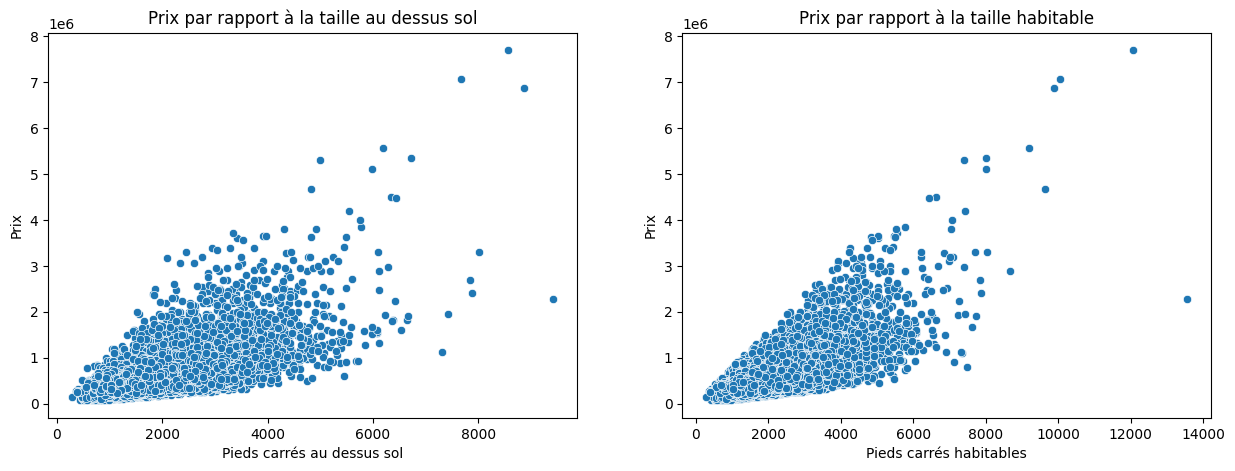

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

# Graphique 1 : scatterplot de sqft_basement en fonction de price
sns.scatterplot(data=df, x="sqft_above", y="price", ax=ax1)
ax1.set_xlabel("Pieds carrés au dessus sol")
ax1.set_ylabel("Prix")
ax1.set_title("Prix par rapport à la taille au dessus sol")

# Graphique 2 : scatterplot de sqft_living en fonction de price
sns.scatterplot(data=df, x="sqft_living", y="price", ax=ax2)
ax2.set_xlabel("Pieds carrés habitables")
ax2.set_ylabel("Prix")
ax2.set_title("Prix par rapport à la taille habitable")

# Affichage de la figure
plt.show()

# Nombre de maison vendu par prix

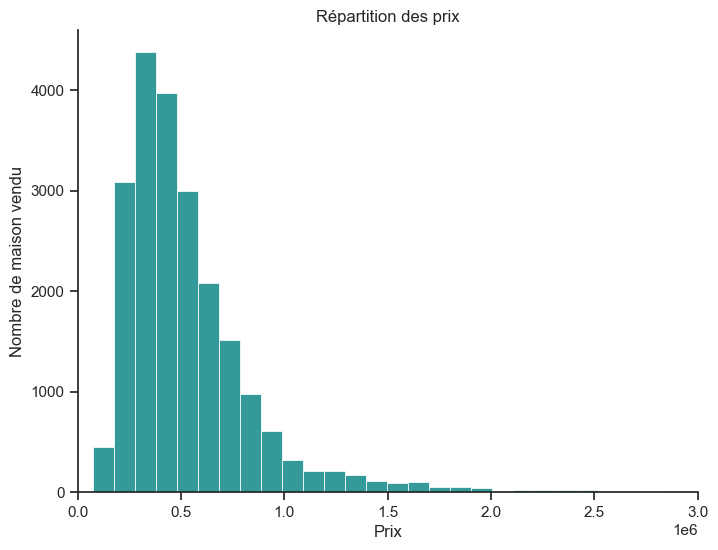

In [15]:
# définir le style Seaborn à utiliser
sns.set(style='ticks', palette='Set2')

# créer le graphique avec Seaborn
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df['price'], bins=75, kde=False, color='teal', alpha=0.8, edgecolor='white')

# ajouter des étiquettes et des titres
ax.set_xlim([0, 3000000])

ax.set_xlabel('Prix')
ax.set_ylabel('Nombre de maison vendu')
ax.set_title('Répartition des prix')

# supprimer les bords supérieur et droit
sns.despine()

# afficher le graphique
plt.show()

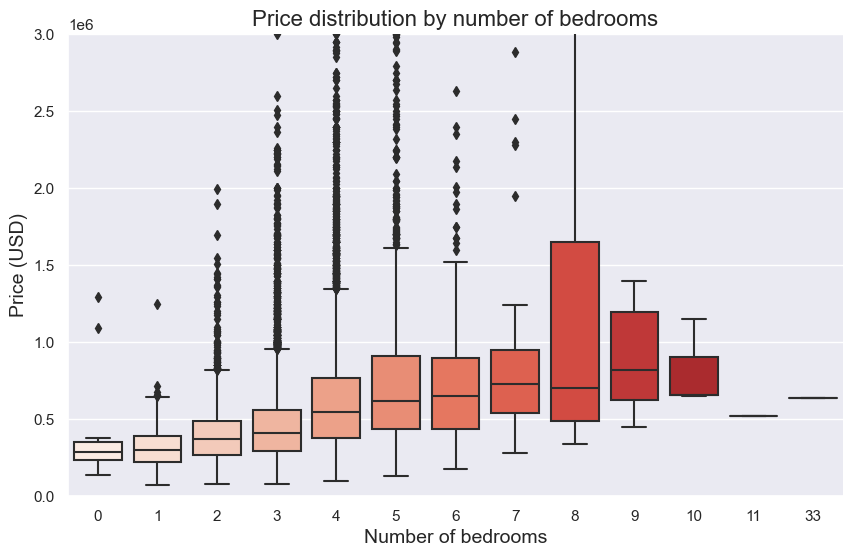

In [16]:
# nuage de point entre prix et nombre de chambre (surface)

# g =sns.histplot(data=df,x="bedrooms", y="price")
sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x=df["bedrooms"], y=df["price"], palette="Reds", ax=ax)
ax.set_ylim(0, 3000000)
ax.set_xlabel("Number of bedrooms", fontsize=14)
ax.set_ylabel("Price (USD)", fontsize=14)
ax.set_title("Price distribution by number of bedrooms", fontsize=16)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()


In [17]:
# /////////////////  drop de bedrooms 0 et 33 //////////
# df = df.drop(df.loc[(df['bedrooms'] == 0) | (df['bedrooms'] == 33)].index)
# df.sort_values(by="bedrooms")

In [18]:
total_price_by_floors = df.groupby('floors')['price'].count()
total_price_by_floors

floors
1.0    10680
1.5     1910
2.0     8241
2.5      161
3.0      613
3.5        8
Name: price, dtype: int64

In [19]:

# Diviser les prix en tranches de 200 000 $ jusqu'à 9 000 000 $
bins = pd.IntervalIndex.from_tuples([(0, 200000), (200000, 400000), (400000, 600000), (600000, 800000), (800000, 1000000), (1000000, 1200000), (1200000, 1400000), (1400000, 1600000), (1600000, 1800000), (1800000, 2000000), (2000000, 9000000)])

# Compter le nombre de maisons dans chaque tranche de prix
price_counts = pd.cut(df['price'], bins=bins).value_counts().sort_index()

# Afficher le résultat
price_counts

(0, 200000]            841
(200000, 400000]      7998
(400000, 600000]      6518
(600000, 800000]      3311
(800000, 1000000]     1480
(1000000, 1200000]     484
(1200000, 1400000]     366
(1400000, 1600000]     189
(1600000, 1800000]     135
(1800000, 2000000]      93
(2000000, 9000000]     198
Name: price, dtype: int64

# Nombre de maisons par prix

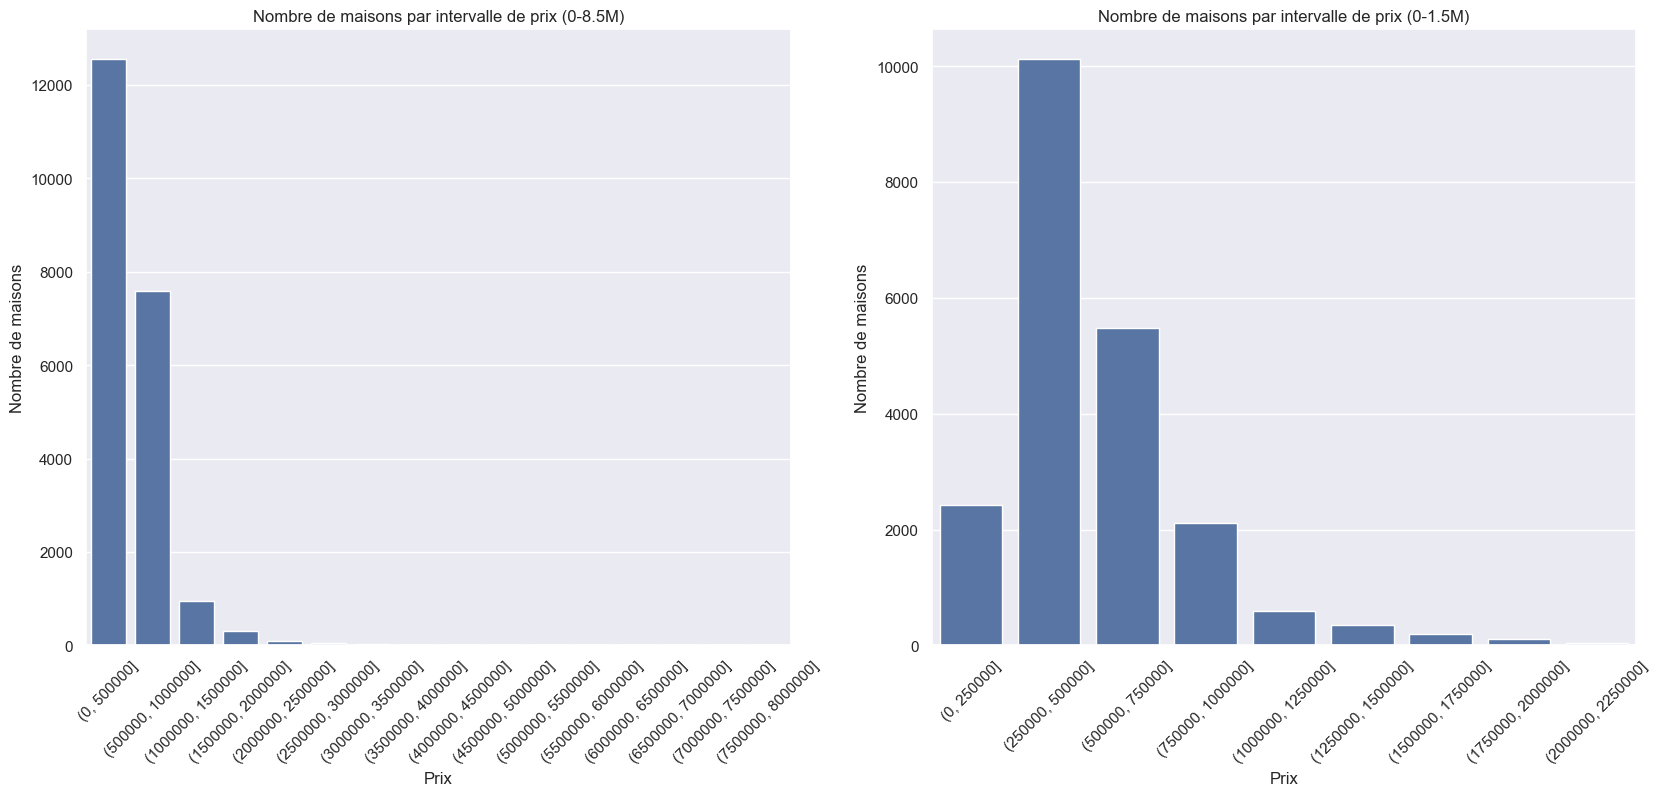

In [20]:
# Définir les intervalles de prix pour le premier graphique
price_ranges1 = pd.cut(df['price'], bins=range(0, 8500000, 500000))

# Compter le nombre de maisons dans chaque intervalle de prix pour le premier graphique
price_counts1 = price_ranges1.value_counts().sort_index()

# Définir les intervalles de prix pour le deuxième graphique
price_ranges2 = pd.cut(df['price'], bins=range(0, 2500000, 250000))

# Compter le nombre de maisons dans chaque intervalle de prix pour le deuxième graphique
price_counts2 = price_ranges2.value_counts().sort_index()

# Tracer les deux graphiques à barres
sns.set_style('darkgrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(x=price_counts1.index, y=price_counts1.values, color='b', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_xlabel('Prix')
ax1.set_ylabel('Nombre de maisons')
ax1.set_title('Nombre de maisons par intervalle de prix (0-8.5M)')

sns.barplot(x=price_counts2.index, y=price_counts2.values, color='b', ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.set_xlabel('Prix')
ax2.set_ylabel('Nombre de maisons')
ax2.set_title('Nombre de maisons par intervalle de prix (0-1.5M)')

plt.show()

# Relation entre le waterfront et le prix 

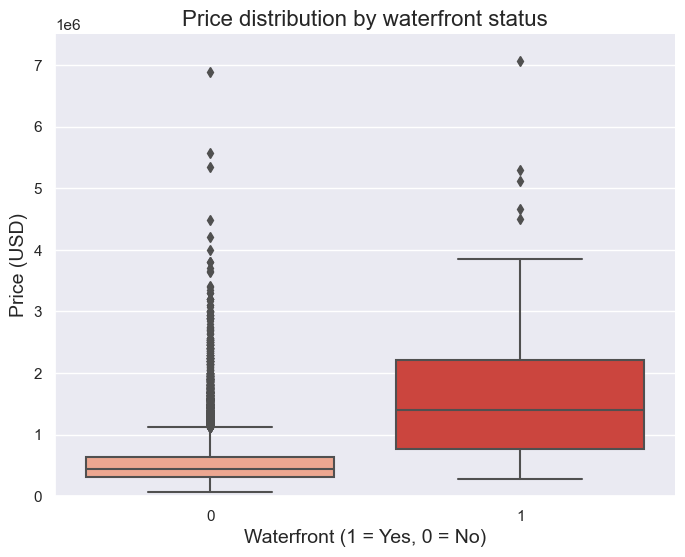

In [21]:
# fair boxplot condition par raport au prix
# fair boxplot floor par raport au prix 

sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["waterfront"], y=df["price"], palette="Reds", ax=ax)
ax.set_ylim(0, 7500000)
ax.set_xlabel("Waterfront (1 = Yes, 0 = No)", fontsize=14)
ax.set_ylabel("Price (USD)", fontsize=14)
ax.set_title("Price distribution by waterfront status", fontsize=16)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()
 





In [22]:
df.groupby('waterfront')['price'].describe()



,count,mean,std,min,25%,50%,75%,max
waterfront,,,,,,,,
0,21450.0,5.315636e+05,3.415996e+05,75000.0,320000.0,450000.0,639897.0,7700000.0
1,163.0,1.661876e+06,1.120372e+06,285000.0,760000.0,1400000.0,2215000.0,7062500.0


In [23]:
df.groupby('floors')['price'].describe()


,count,mean,std,min,25%,50%,75%,max
floors,,,,,,,,
1.0,10680.0,4.421806e+05,264003.242899,75000.0,275000.0,390000.0,530000.0,4668000.0
1.5,1910.0,5.589806e+05,303541.333191,92000.0,355000.0,524475.0,687875.0,3650000.0
2.0,8241.0,6.488912e+05,433937.656294,90000.0,378800.0,542950.0,772500.0,7062500.0
2.5,161.0,1.060346e+06,858259.485933,255000.0,550000.0,799200.0,1300000.0,7700000.0
3.0,613.0,5.825260e+05,338249.166345,205000.0,385000.0,490000.0,631500.0,3100000.0
3.5,8.0,9.333125e+05,978616.477391,435000.0,513500.0,534500.0,696375.0,3300000.0


# Relation entre la condition et le prix 

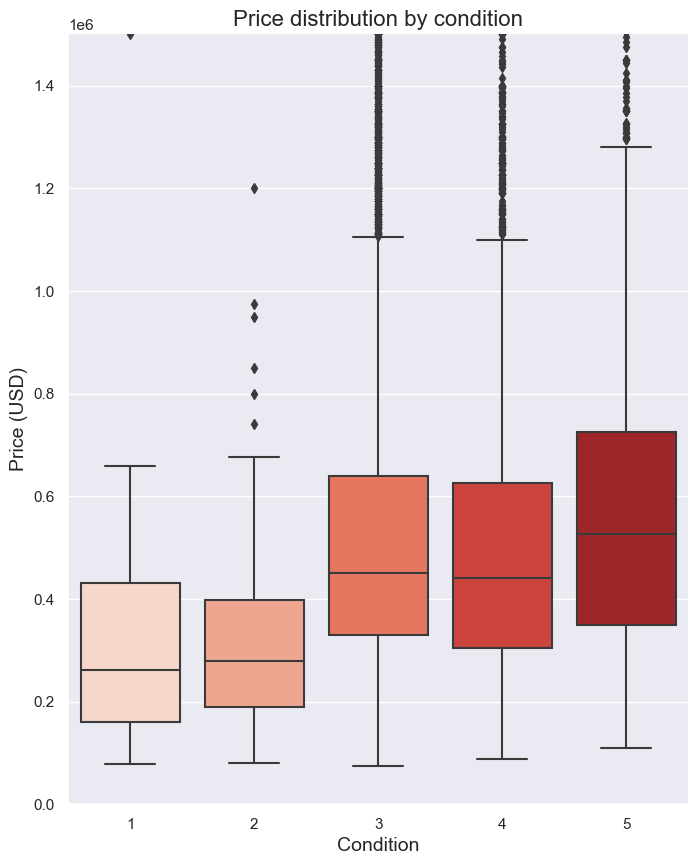

In [24]:
# fair boxplot floor par raport au prix 
fig, ax = plt.subplots(figsize=(8, 10))
sns.boxplot(x=df["condition"], y=df["price"], palette="Reds", ax=ax)
ax.set_ylim(0, 1500000)
ax.set_xlabel("Condition", fontsize=14)
ax.set_ylabel("Price (USD)", fontsize=14)
ax.set_title("Price distribution by condition", fontsize=16)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

In [25]:
# # fair boxplot floors par raport au prix 
# sns.set(style="darkgrid")

# fig, ax = plt.subplots(figsize=(10, 6))
# sns.boxplot(x=df["floors"], y=df["price"], palette="YlOrBr", ax=ax)
# ax.set_ylim(0, 2500000)
# ax.set_xlabel("Number of Floors", fontsize=14)
# ax.set_ylabel("Price (USD)", fontsize=14)
# ax.set_title("Price distribution by number of floors", fontsize=16)
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)

# plt.show()



In [26]:
# g = sns.histplot(data=df, x="price", hue="floors", multiple="stack")
# g.set(xlabel="Price", ylabel="Count", title="Distribution of Price by Number of Floors")
# g.set_xlim([0, 3000000])

# plt.show()

# Relation entre le nombre d'etage et le prix moyen

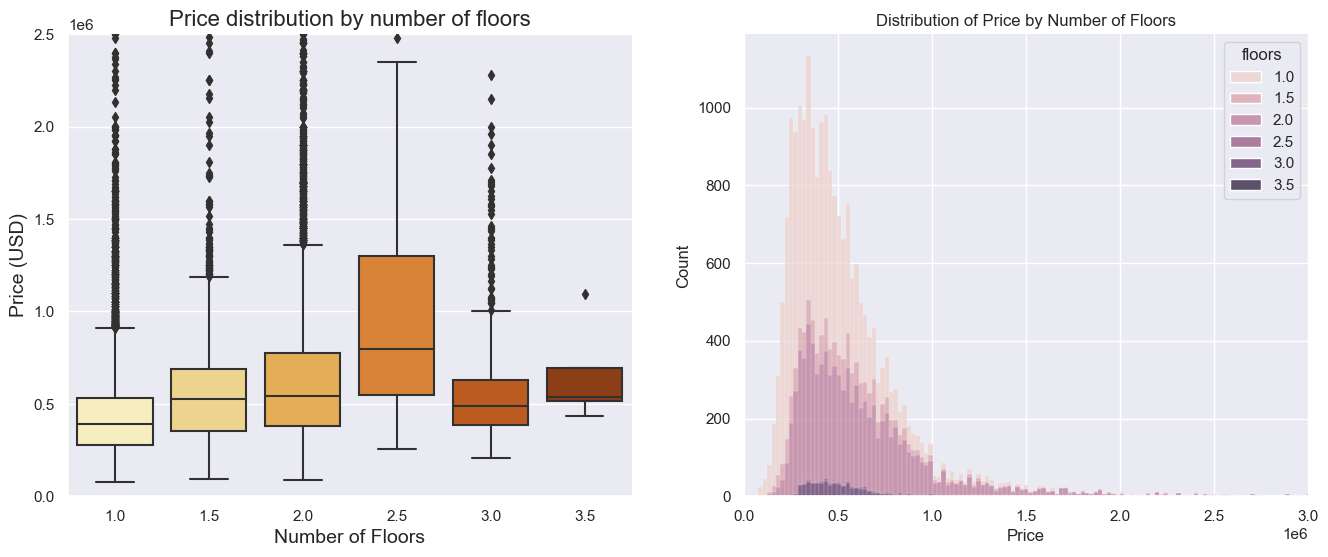

In [27]:
sns.set(style="darkgrid")

# Create the first plot: boxplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(x=df["floors"], y=df["price"], palette="YlOrBr", ax=ax1)
ax1.set_ylim(0, 2500000)
ax1.set_xlabel("Number of Floors", fontsize=14)
ax1.set_ylabel("Price (USD)", fontsize=14)
ax1.set_title("Price distribution by number of floors", fontsize=16)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

# Create the second plot: histogram
sns.histplot(data=df, x="price", hue="floors", multiple="stack", ax=ax2)
ax2.set(xlabel="Price", ylabel="Count", title="Distribution of Price by Number of Floors")
ax2.set_xlim([0, 3000000])

# Remove spines from second plot
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

plt.show()

In [28]:
# df = df.sort_values(by=['id', 'date'], ascending=[True, False])

# # conserver uniquement la première occurrence de chaque identifiant
# df = df.drop_duplicates(subset=['id'], keep='first')
# df.sort_values(by=['id',])

In [29]:
total_price_by_grade = df.groupby('grade')['price'].count()
total_price_by_grade

grade
1        1
3        3
4       29
5      242
6     2038
7     8981
8     6068
9     2615
10    1134
11     399
12      90
13      13
Name: price, dtype: int64

In [30]:
# # Compter le nombre d'occurrences pour chaque grade
# counts = df['grade'].value_counts()

# # Créer un graphique circulaire
# fig, ax = plt.subplots(figsize=(6, 6))
# ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)

# # Ajouter un titre
# ax.set_title("Distribution des grades")

# # Afficher le graphique
# plt.show()


In [31]:

# # Définir des couleurs pour chaque grade
# colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
#           'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 
#           'gold', 'chocolate', 'salmon']

# # Compter le nombre d'occurrences pour chaque grade
# counts = df['grade'].value_counts().sort_index()

# # Créer un graphique en barplot
# sns.set_style('darkgrid')
# plt.figure(figsize=(10, 6))
# sns.barplot(x=counts.index, y=counts.values, palette=colors)
# plt.xlabel('Grade')
# plt.ylabel("Nombre d'occurrences")
# plt.title('Distribution des grades')
# plt.show()


# Relation entre le grade et le prix moyen

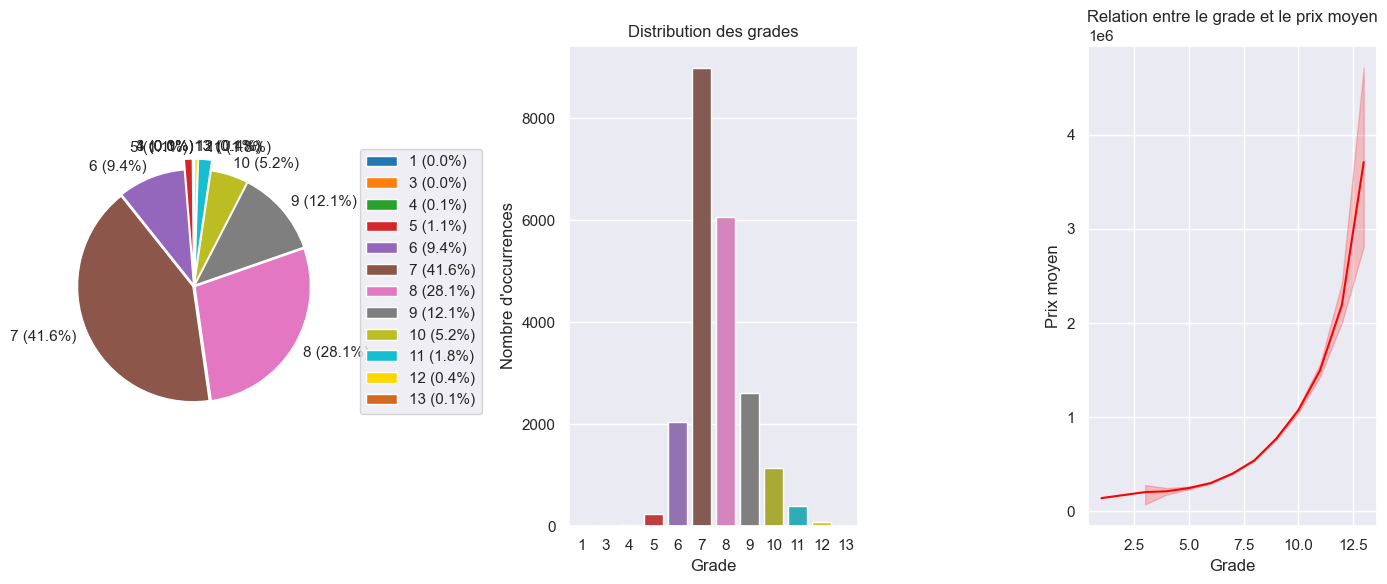

In [32]:

# Définir des couleurs pour chaque grade
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 
          'gold', 'chocolate', 'salmon']

# Compter le nombre d'occurrences pour chaque grade
counts = df['grade'].value_counts().sort_index()

# Créer le premier graphique (camembert)
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(14, 6))

small_grades = counts.nsmallest(7).index.tolist()

# Calculer les parts à prendre pour chaque slice
explode = [0.10 if grade in small_grades else 0.01 for grade in counts.index]
labels = counts.index
sizes = counts.values
ax1.pie(sizes, labels=["{} ({:.1f}%)".format(l, s/sum(sizes)*100) for l, s in zip(labels, sizes)],
        colors=colors, autopct='', startangle= 90 , explode=explode)
# ax1.set_title("Distribution des grades")
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Créer le deuxième graphique (barplot)
sns.set_style('darkgrid')
sns.barplot(x=counts.index, y=counts.values, palette=colors, ax=ax2)
ax2.set_xlabel('Grade')
ax2.set_ylabel("Nombre d'occurrences")
ax2.set_title('Distribution des grades')

# Créer le troisième graphique (lineplot)
sns.lineplot(x='grade', y='price', data=df, color='red', ax=ax3)
ax3.set_xlabel('Grade')
ax3.set_ylabel("Prix moyen")
ax3.set_title('Relation entre le grade et le prix moyen')

# Afficher les graphiques
plt.tight_layout()
plt.show()

In [33]:

# sns.lineplot(x='grade', y='price', data=df)


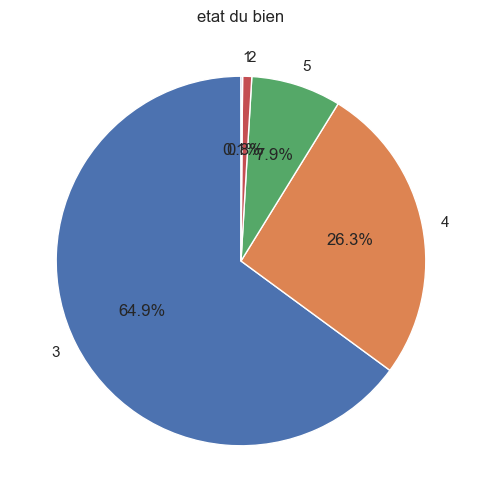

In [34]:
# Compter le nombre d'occurrences pour chaque grade
counts = df["condition"].value_counts()

# Créer un graphique circulaire
fig, ax = plt.subplots(figsize=(9, 6))
ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)

# Ajouter un titre
ax.set_title("etat du bien")

# Afficher le graphique
plt.show()

<Axes: xlabel='condition', ylabel='price'>

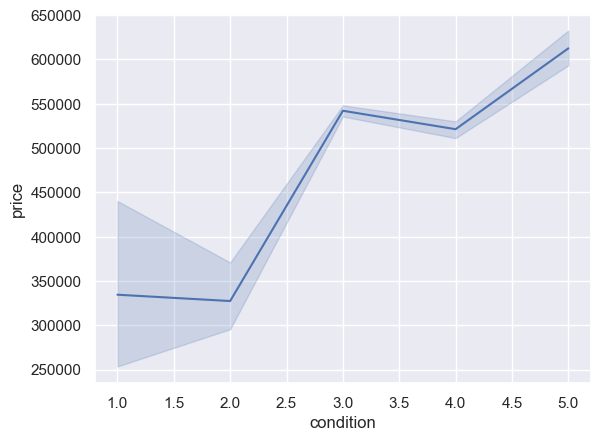

In [35]:
sns.lineplot(x='condition', y='price', data=df)


In [36]:

# # Compter le nombre d'occurrences pour chaque grade
# counts = df['view'].value_counts()

# # Créer un graphique en barres
# fig, ax = plt.subplots(figsize=(10, 8))
# ax.bar(counts.index, counts, color=colors)



# # Ajouter des labels aux axes et un titre
# ax.set_xlabel("qualite de la vue ")
# ax.set_ylabel("Nombre d'occurrences")
# ax.set_title("la vue")

# # Afficher le graphique
# plt.show()

In [37]:
# sns.lineplot(x="view", y='price', data=df)


# Relation entre la qualité de vue et le prix

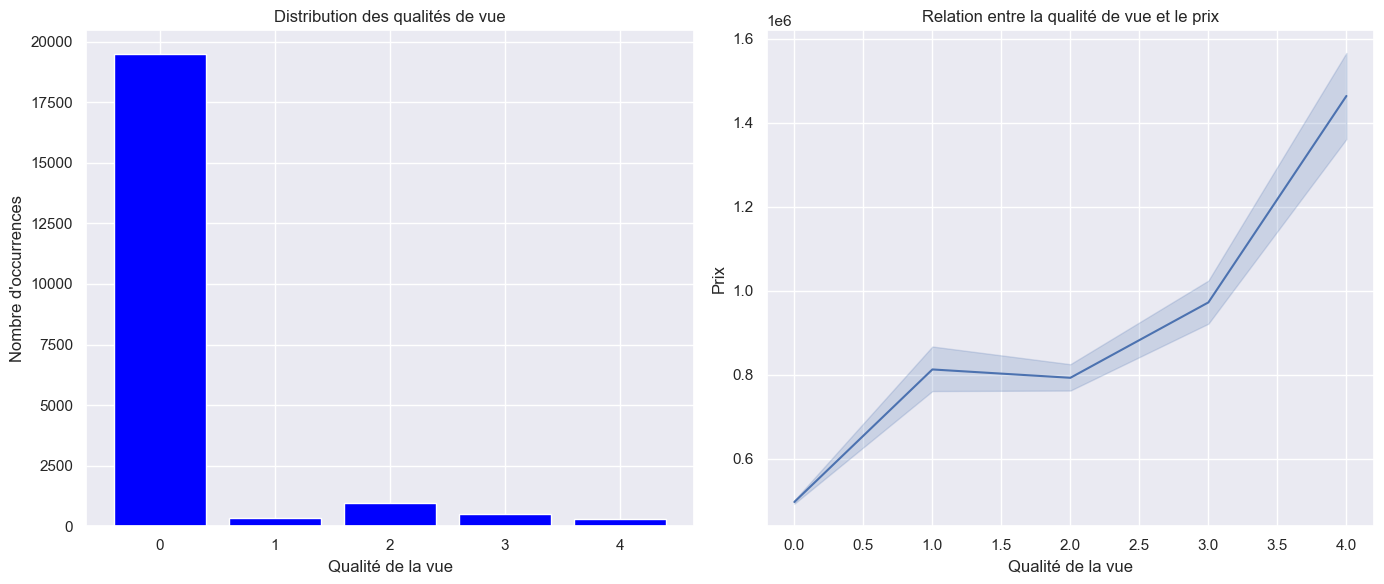

In [38]:
# Compter le nombre d'occurrences pour chaque grade
counts = df['view'].value_counts()

# Créer une figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Ajouter le graphique en barres au premier sous-graphique
ax1.bar(counts.index, counts, color='blue')
ax1.set_xlabel("Qualité de la vue")
ax1.set_ylabel("Nombre d'occurrences")
ax1.set_title("Distribution des qualités de vue")

# Ajouter le graphique de ligne au deuxième sous-graphique
sns.lineplot(x="view", y='price', data=df, ax=ax2)
ax2.set_xlabel("Qualité de la vue")
ax2.set_ylabel("Prix")
ax2.set_title("Relation entre la qualité de vue et le prix")

# Afficher la figure
plt.tight_layout()
plt.show()

# Nombre de vente mensuelle 

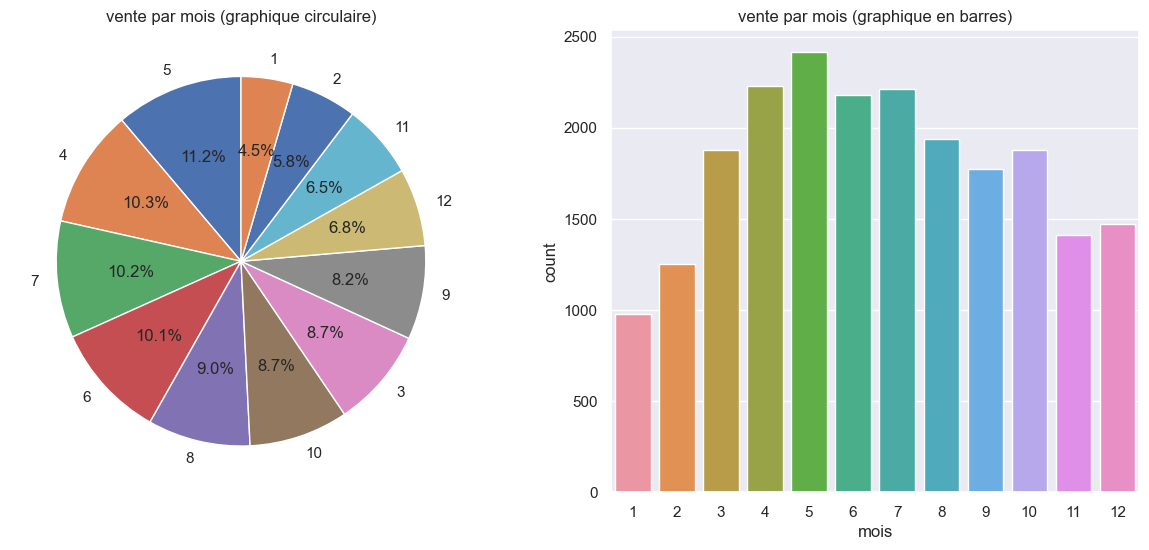

In [39]:
# Conversion de la colonne 'date' en objet datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Extraction des composants d'année et de mois
df['annee'] = df['date'].dt.year
df['mois'] = df['date'].dt.month
df[["id",'annee',"mois","price"]]


# Créer une grille de graphiques
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Graphique circulaire
counts = df["mois"].value_counts()
axs[0].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title("vente par mois (graphique circulaire)")

# Graphique en barres avec Seaborn
sns.countplot(x='mois', data=df, ax=axs[1])
axs[1].set_title("vente par mois (graphique en barres)")

# Afficher le graphique
plt.show()


In [40]:
df.shape
df = df.drop([ "id"], axis=1)


# Prix moyen par zipcode

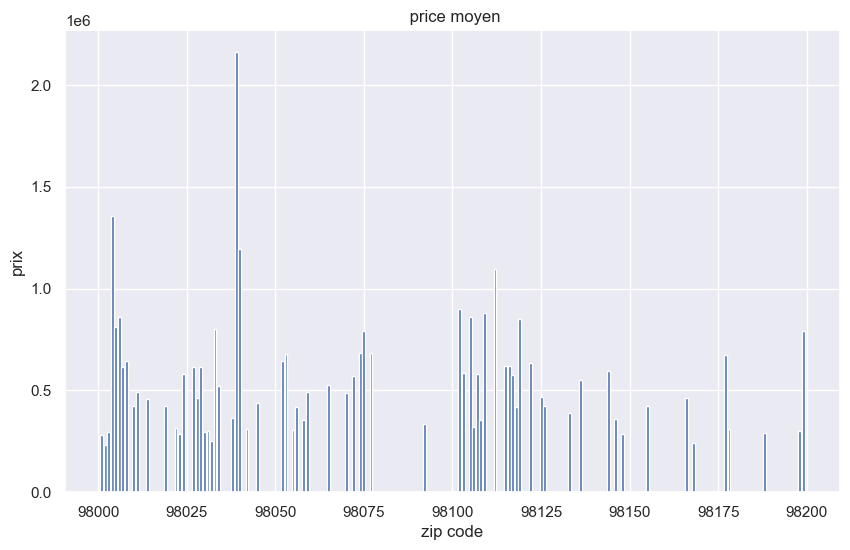

In [41]:
df_1 = df[["price" , "zipcode" ]].groupby(by="zipcode").mean()
df_1
fig, ax = plt.subplots()       # pour crée l'objet 
fig.set_size_inches(10,6)   # pour recadre la taille de la figure
ax.bar(df_1.index, df_1.price)  
ax.set_title(" price moyen")
ax.set_xlabel("zip code")
ax.set_ylabel("prix")
plt.show()


C:\Users\impej\AppData\Local\Temp\ipykernel_1524\2983403878.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prix_zipcode = df.groupby('zipcode').mean()['price'].sort_values(ascending=True)


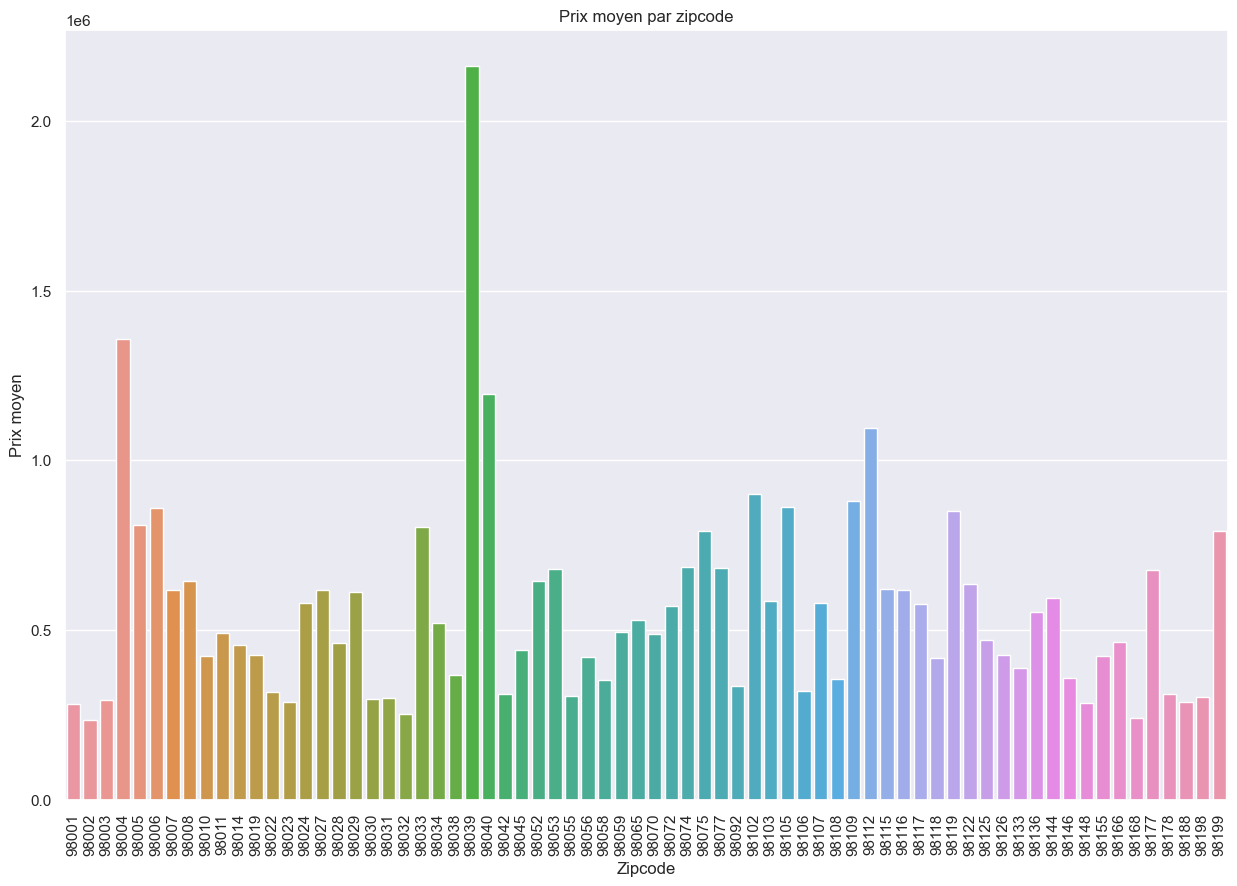

In [42]:
prix_zipcode = df.groupby('zipcode').mean()['price'].sort_values(ascending=True)
plt.figure(figsize=(15, 10))
sns.barplot(x=prix_zipcode.index, y=prix_zipcode.values)
plt.title('Prix moyen par zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Prix moyen')
plt.xticks(rotation=90)
plt.show()

C:\Users\impej\AppData\Local\Temp\ipykernel_1524\1728345661.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prix_zipcode = df.groupby('bedrooms').mean()['price'].sort_values(ascending=True)


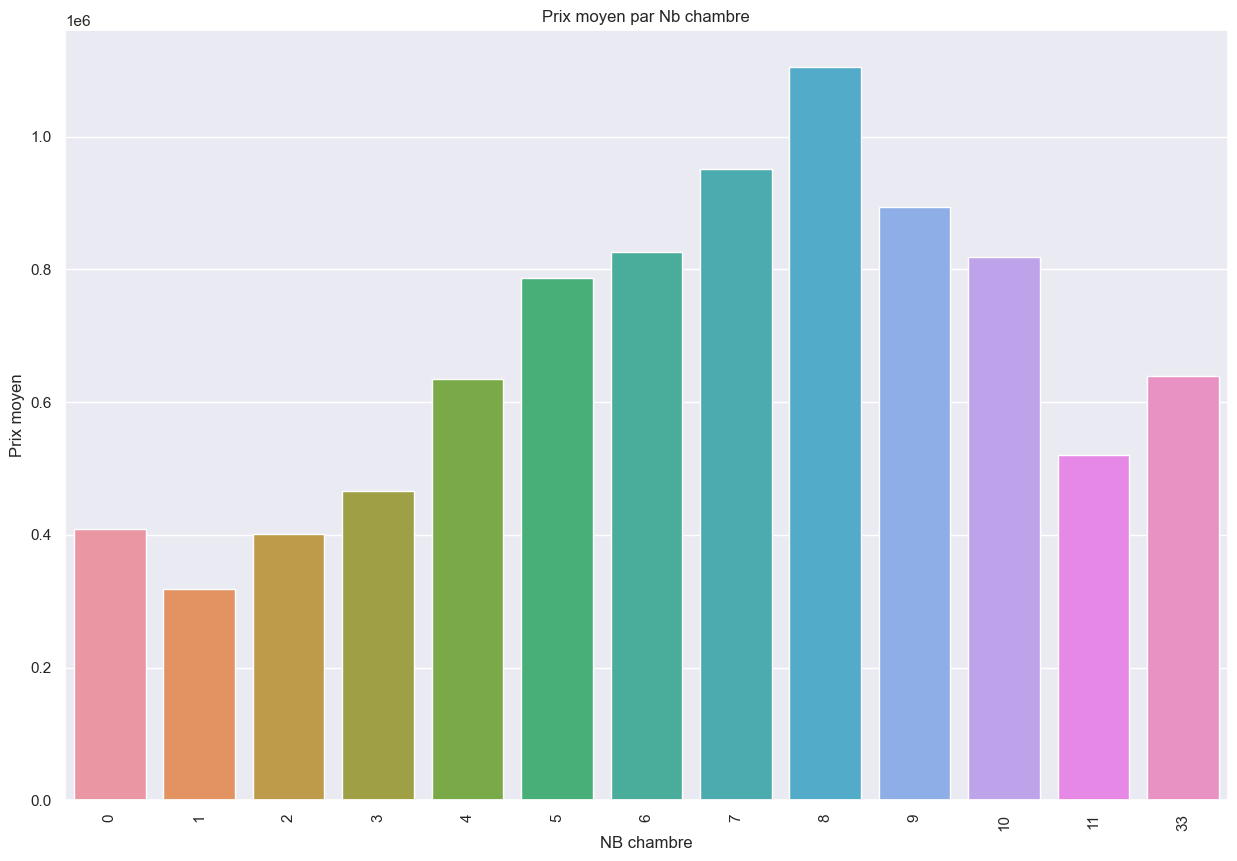

In [43]:
prix_zipcode = df.groupby('bedrooms').mean()['price'].sort_values(ascending=True)
plt.figure(figsize=(15, 10))
sns.barplot(x=prix_zipcode.index, y=prix_zipcode.values)
plt.title('Prix moyen par Nb chambre')
plt.xlabel('NB chambre')
plt.ylabel('Prix moyen')
plt.xticks(rotation=90)
plt.show()

# Carte des   maisons 

In [44]:
import folium
from branca.element import Figure
fig = Figure(width=600, height=400)
m = folium.Map(location=[47.570689, -122.090698], zoom_start=9)
data = pd.read_csv('kc_house_data.csv')
data = data.sample(100)[['lat','long']]
for i, j in data.iterrows():
    folium.Marker(
        location=[j['lat'], j['long']]
    ).add_to(m)
fig.add_child(m)

Carte des 25 maisons les plus chères et des 25 moins chères

In [63]:
import folium
from branca.element import Figure

fig = Figure(width=600, height=400)
m = folium.Map(location=[47.570689, -122.090698], zoom_start=9)

data = pd.read_csv('kc_house_data.csv')
data_top = data.sort_values(by='price', ascending=False).iloc[:300][['lat', 'long']]
data_bottom = data.sort_values(by='price').iloc[:300][['lat', 'long']]

for i, j in data_top.iterrows():
    folium.Marker(
        location=[j['lat'], j['long']],
        icon=folium.Icon(color='red')
    ).add_to(m)

for i, j in data_bottom.iterrows():
    folium.Marker(
        location=[j['lat'], j['long']],
        icon=folium.Icon(color='green')
    ).add_to(m)

fig.add_child(m)
# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////
# //////////////    Carte des 25 maisons les plus chères et des 25 moins chères ////////////////
# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////


 Carte des   maisons qui a vue sur l'eau 

In [46]:
import folium
from branca.element import Figure

# Créer une nouvelle figure avec la taille spécifiée
fig = Figure(width=800, height=600)

# Créer une carte avec la latitude et la longitude spécifiées comme point de départ
m = folium.Map(location=[47.570689, -122.090698], zoom_start=9)

# Charger les données à partir du fichier CSV
data = pd.read_csv('kc_house_data.csv')

# Filtrer les propriétés riveraines
waterfront_data = data.loc[data['waterfront'] == 1, ['lat', 'long']]

# Ajouter un marqueur pour chaque emplacement de propriété riveraine
for i, j in waterfront_data.iterrows():
    folium.Marker(
        location=[j['lat'], j['long']],
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Ajouter la carte à la figure
fig.add_child(m)

# Afficher la figure
fig


# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////
# //////////////    Carte des   maisons qui a vue sur l'eau  /////////////////////////////////////////////////////
# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////


In [47]:
# fair boxplot condition par raport au prix
# fair boxplot floor par raport au prix 
# nuage de point entre prix et metre carre (surface)


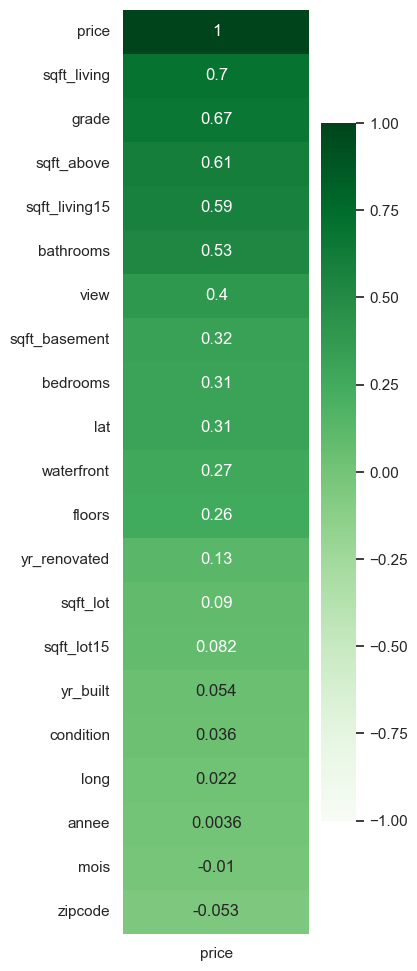

In [69]:
fig, ax = plt.subplots(figsize=(3,12))
sns.heatmap(df.corr(numeric_only = True)[["price"]].sort_values('price'), vmax=1, vmin=-1, cmap='Greens', annot=True, ax=ax)
ax.invert_yaxis()

<Axes: >

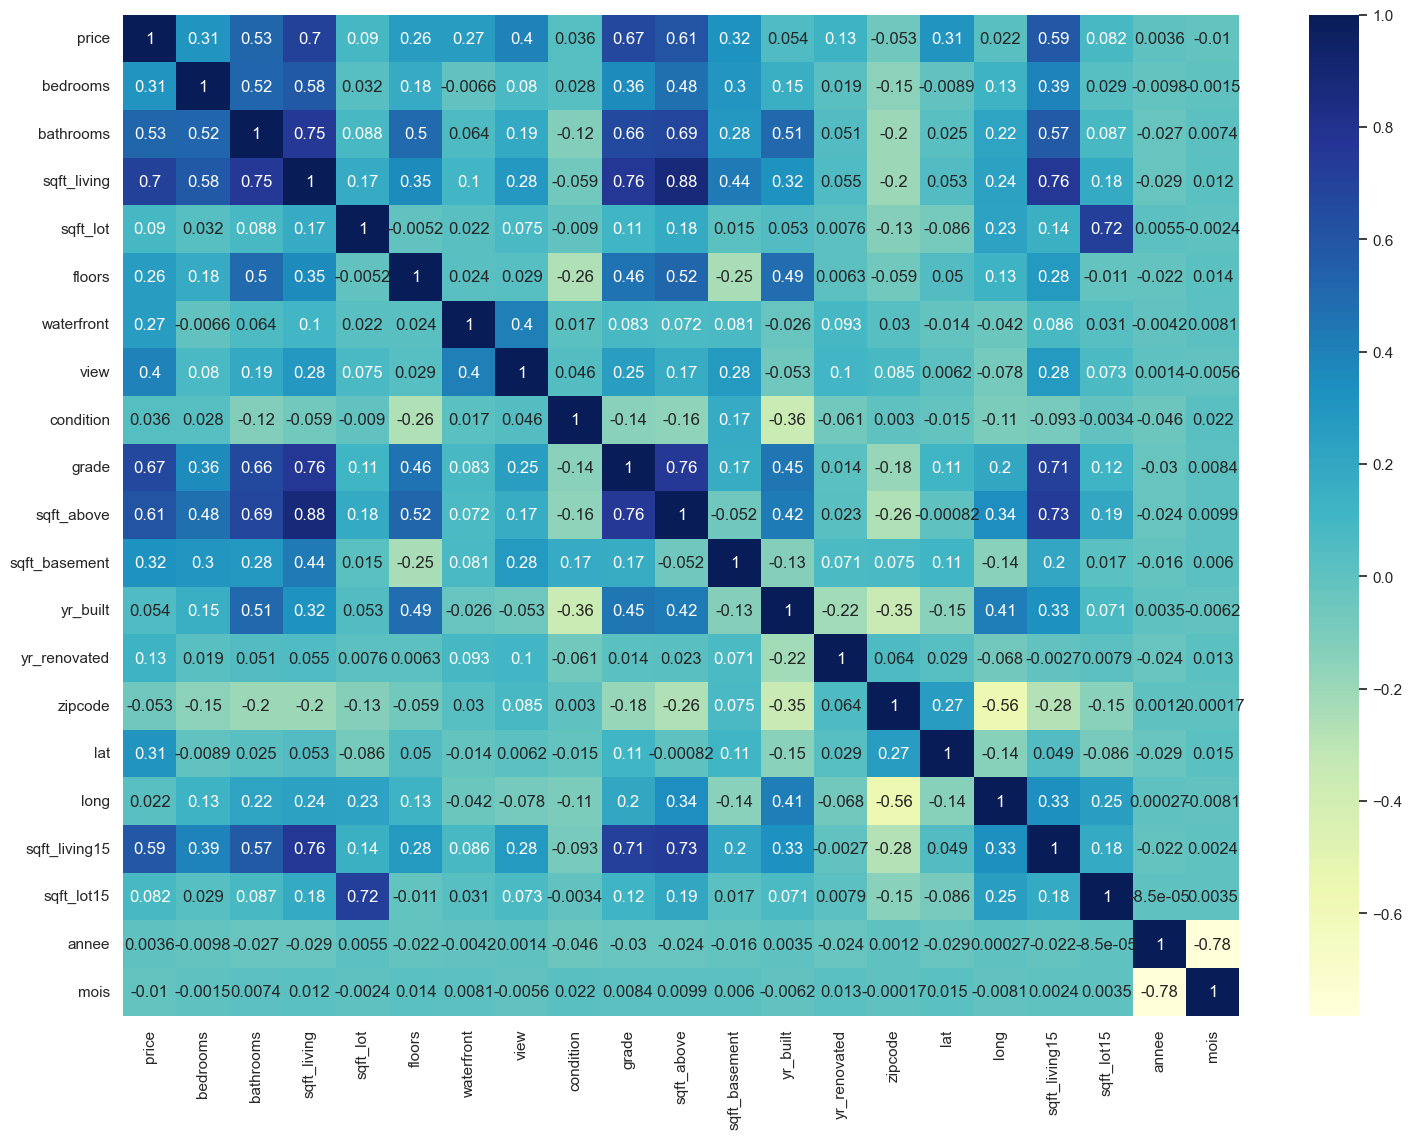

In [48]:

corr_matrix = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")



In [49]:
# matrix = df.corr()
# matrix

In [50]:
df
df.to_csv('kc_house_data_clean.csv')

In [51]:
# 1 supprimer les colonne inutile df = df.drop(["nom_col", "nom_col"], axis=1)
# 2 supprimer les serie pour ne pas corrompre les données df = df.dropna(axis=0)   dans ce df il y a aucun NAN


In [52]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# df = pd.read_csv("kc_house_data.csv")

In [53]:
# //////////////////////////////  PREPARATION ////////////////////////////////

In [54]:
# df.loc[df['yr_renovated'] == 0, 'yr_renovated'] = df['yr_built']
# df

In [55]:
# print(df.price.corr(df['yr_renovated']))

In [56]:
# df = df.drop(["id","date", "waterfront","sqft_lot",'sqft_lot15','condition','lat', 'long', 'yr_built'], axis=1)  # on va esseyer de supprimer la co
# # print(df.price.corr(df['sqft_lot15']))
# df.head(3)

In [57]:
# print(df.price.corr(df['sqft_above']))

In [58]:
# df = df.rename(columns={'bedrooms': 'chambres' ,  'bathrooms': 'salles de bain',  'sqft_living': 'surface à vivre',
#                         'sqft_lot': 'surface du terrain' ,  'floors': 'Nb étage',  'condition': 'etat du bien',
#                           'grade': 'qualite construction' ,  'yr_built': 'année construction',  
#                           'yr_renovated': 'années renovation / construction',
#                           'zipcode': 'code postal' , 'sqft_living15'  : 'surface à vivre des 15 voisin les plus proche',  
#                           'sqft_basement' :'surface sous-sol', 'view': 'qualite de la vue', "price" : "prix"
#                           })
# df

In [59]:
# # print(df.price.corr(df['surface à vivre des 15 voisin les plus proche'])) 15870
# df.sort_values(by="chambres").head(30)
# #df = df.drop([df.chambres[15870]], axis=0)  # on va esseyer de supprimer la co

# # df.loc[df['chambres'] == 33] df['chambres'] =3

# df = df.drop(df.loc[(df['chambres'] == 0) | (df['chambres'] == 33)].index)

# df

In [60]:
# df.sort_values(by="chambres")